In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_csv('alcohol-consumption.csv')

In [3]:
df.head(3)

,Entity,Code,Year,Total alcohol consumption per capita
0,Afghanistan,AFG,2010,0.21
1,Afghanistan,AFG,2015,0.21
2,Afghanistan,AFG,2018,0.21


In [4]:
df = df.rename(columns={'Total alcohol consumption per capita':'tac'})

In [5]:
df.dtypes

Entity     object
Code       object
Year        int64
tac       float64
dtype: object

In [6]:
df.isnull().sum()

Entity      0
Code      235
Year        0
tac         0
dtype: int64

In [7]:
df = df.set_index('Year')

In [8]:
df.describe()

,tac
count,1164.000000
mean,6.041385
std,4.080525
min,0.000000
25%,2.545000
50%,5.655406
75%,9.190000
max,20.500000


In [9]:
check = df[df['Code'].isna()].groupby(['Entity'])
check.describe()

tac                       \
                                                   count       mean       std   
Entity                                                                          
Africa Eastern and Southern                          5.0   5.131846  0.210517   
Africa Western and Central                           5.0   7.421209  0.560810   
Arab World                                           5.0   0.642656  0.020994   
Caribbean Small States                               5.0   5.785873  0.083162   
Central Europe and the Baltics                       5.0  12.334959  0.400581   
Early-demographic dividend                           5.0   3.257395  0.701355   
East Asia & Pacific                                  5.0   5.488846  1.234845   
East Asia & Pacific (IDA & IBRD)                     5.0   5.118940  1.456786   
East Asia & Pacific (excluding high income)          5.0   5.101697  1.440198   
Euro area                                            5.0  11.741086  0.721073   
Europe & Central Asia                                5.0  11.006127  1.078728   
Europe & Central Asia (IDA & IBRD)                   5.0  10.126739  1.592700   
Europe & Central Asia (excluding high income)        5.0  10.056139  1.836707   
European Union                                       5.0  11.794922  0.634359   
Fragile and conflict affected situations             5.0   4.683791  0.277661   
Heavily indebted poor countries (HIPC)               5.0   4.108618  0.094522   
High income                                          5.0  10.026077  0.418051   
IBRD only                                            5.0   5.432045  0.853837   
IDA & IBRD total                                     5.0   5.078768  0.668470   
IDA blend                                            5.0   4.968437  0.361550   
IDA only                                             5.0   2.947042  0.212563   
IDA total                                            5.0   3.650139  0.038259   
Late-demographic dividend                            5.0   6.722939  0.978826   
Latin America & Caribbean                            5.0   6.889694  0.406416   
Latin America & Caribbean (IDA & IBRD)               5.0   6.925977  0.427022   
Latin America & Caribbean (excluding high income)    5.0   6.782031  0.354324   
Least developed countries: UN classification         5.0   2.956283  0.370462   
Low & middle income                                  5.0   4.995248  0.681094   
Low income                                           5.0   3.209630  0.056634   
Lower middle income                                  5.0   3.659989  0.839610   
Middle East & North Africa                           5.0   0.754904  0.071400   
Middle East & North Africa (IDA & IBRD)              5.0   0.648266  0.065172   
Middle East & North Africa (excluding high income)   5.0   0.648266  0.065172   
Middle income                                        5.0   5.126882  0.746587   
North America                                        5.0   9.522227  0.235281   
OECD members                                         5.0   9.446869  0.401636   
Other small states                                   5.0   5.625958  0.384975   
Pacific island small states                          5.0   2.454199  0.071190   
Post-demographic dividend                            5.0  10.427788  0.425536   
Pre-demographic dividend                             5.0   5.871502  0.285067   
Small states                                         5.0   5.470433  0.272368   
South Asia                                           5.0   3.182918  1.232611   
South Asia (IDA & IBRD)                              5.0   3.182918  1.232611   
Sub-Saharan Africa                                   5.0   6.084577  0.225712   
Sub-Saharan Africa (IDA & IBRD)                      5.0   6.084577  0.225712   
Sub-Saharan Africa (excluding high income)           5.0   6.083743  0.226384   
Upper middle income                                  5.0   6.670486  0.787452   

  

In [10]:
q1 = df.loc[(df['Entity'] == 'High income') | (df['Entity'] == 'Upper middle income') |  (df['Entity'] == 'Middle income') | (df['Entity'] == 'Lower middle income') | (df['Entity'] == 'Low & middle income') | (df['Entity'] == 'Low income') ]

In [11]:
q1

,Entity,Code,tac
Year,,,
2000,High income,NaN,10.560223
2005,High income,NaN,10.389938
2010,High income,NaN,9.635648
2015,High income,NaN,9.764919
2018,High income,NaN,9.779656
2000,Low & middle income,NaN,4.235274
2005,Low & middle income,NaN,4.265939
2010,Low & middle income,NaN,5.507628
2015,Low & middle income,NaN,5.540282


In [12]:
q1_pivot = q1.pivot_table(values='tac', index=['Year'],
                    columns=['Entity'])
q1_pivot

Entity,High income,Low & middle income,Low income,Lower middle income,Middle income,Upper middle income
Year,,,,,,
2000,10.560223,4.235274,3.275198,2.768264,4.290970,5.781994
2005,10.389938,4.265939,3.209379,2.777312,4.329991,5.894506
2010,9.635648,5.507628,3.243443,3.889999,5.664002,7.532983
2015,9.764919,5.540282,3.124896,4.429854,5.733983,7.179354
2018,9.779656,5.427119,3.195236,4.434517,5.615466,6.963592


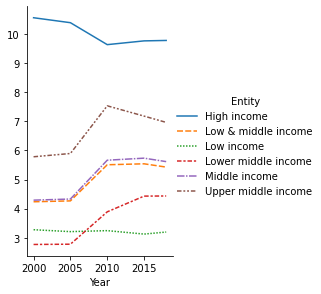

In [13]:
sns.relplot(data=q1_pivot, kind="line", height=4, aspect=.7)

In [14]:
def timeseries_regression(x, entity):
    y = q1_pivot[entity].values
    model = linear_model.LinearRegression().fit(x, y)
    linear_model.LinearRegression()
    print(model.predict([[20], [30], [50]]))

In [15]:
q1_pivot['years_from_start'] = (q1_pivot.index - q1_pivot.index[0]) 
x = q1_pivot['years_from_start'].values.reshape(-1,1)

In [16]:
timeseries_regression(x, 'High income')

[9.51690987 9.02732646 8.04815965]


In [17]:
timeseries_regression(x, 'Upper middle income') 

[ 7.53165679  8.35970562 10.01580328]


In [18]:
timeseries_regression(x, 'Middle income') 

[6.0677485  6.97242735 8.78178505]


In [19]:
timeseries_regression(x, 'Lower middle income') 

[4.80029116 5.89673508 8.08962292]


In [20]:
timeseries_regression(x, 'Low & middle income') 

[5.84531752 6.66269167 8.29743998]


In [21]:
timeseries_regression(x, 'Low income') 

[3.15142315 3.0954546  2.98351748]
